In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [163]:
# Load the data
zaniar = pd.read_excel("~/Downloads/uniTox_ratings_to_be_scored_Zaniar.xlsx", sheet_name=None)
angela = pd.read_excel("~/Downloads/uniTox_ratings_to_be_scored_Angela.xlsx", sheet_name=None)
name_to_data = {
    "Clinician 1": angela,
    "Clinician 2": zaniar,
}
toxicities = list(angela.keys())

{1: array([87, 76, 96, 49, 44]), 2: array([12, 12,  3,  1,  2]), 3: array([ 1, 12,  1,  0,  3])}
{1: array([98, 81, 95, 50, 46]), 2: array([2, 7, 5, 0, 2]), 3: array([ 0, 12,  0,  0,  1])}


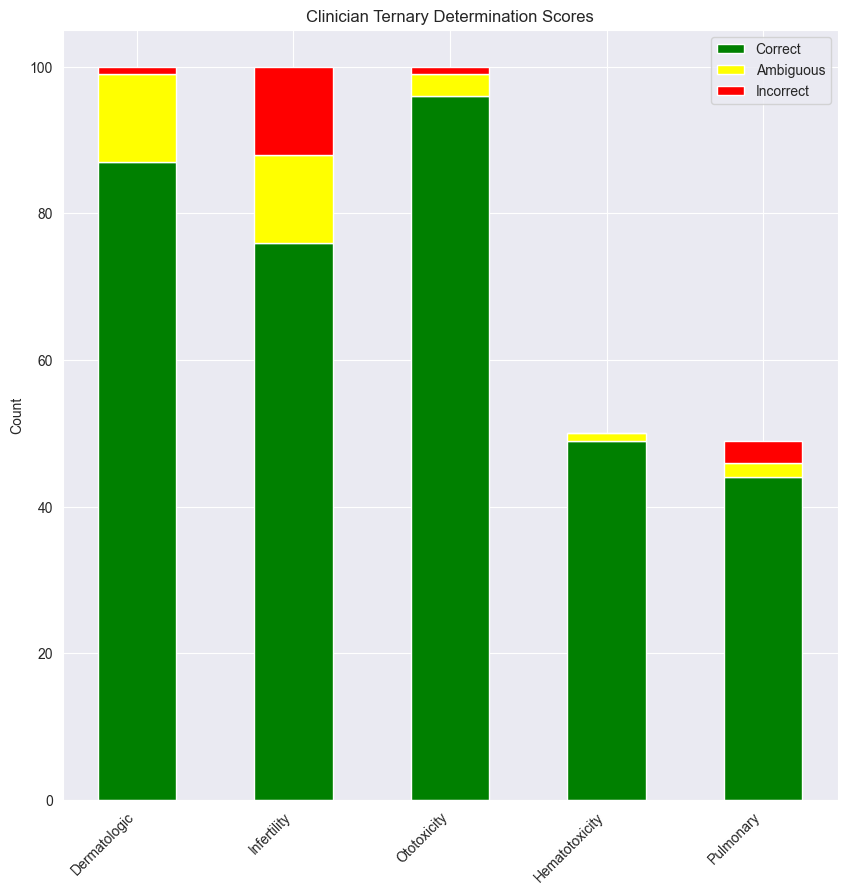

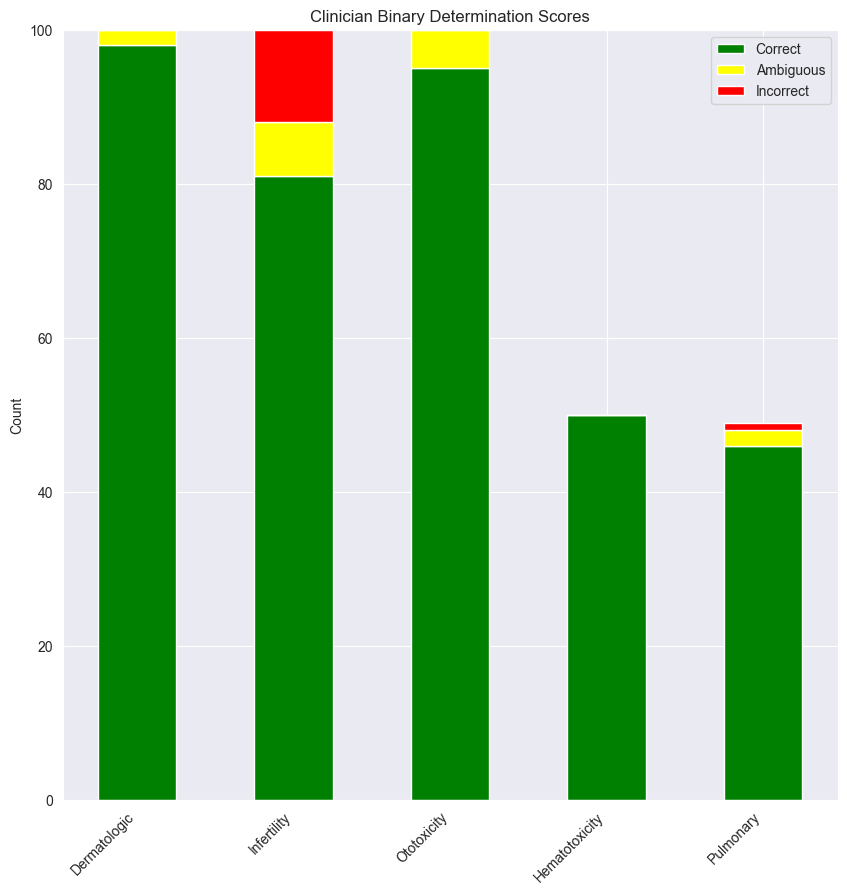

In [166]:
# For each person, create a stacked bar plot of the counts of less_rating_score and binary_rating_score
score_type_to_name = {
    "less_rating_score": "Ternary Rating",
    "binary_rating_score": "Binary Rating",
}

for score_type, score_name in score_type_to_name.items():
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define the bar width
    bar_width = 0.5
    num_tox = 5
    
    # Get the x locations for the groups
    x_axis = np.arange(num_tox)
    
    # Plot each method's bar on top of the previous one
    bottom = np.zeros(num_tox)
    scores = [1, 2, 3]
    labels = ["Correct", "Ambiguous", "Incorrect"]
    colors = ["green", "yellow", "red"]
    
    score_nums = {
        score: np.array([
            (angela[tox_type][score_type] == score).sum(axis=0) + (zaniar[tox_type][score_type] == score).sum(axis=0)
            for tox_type in toxicities
        ]) for score in scores
    }
    
    for score, label, color in zip(scores, labels, colors):
        ax.bar(x_axis, score_nums[score], bottom=bottom, width=bar_width, label=label, color=color)
        bottom += score_nums[score]
    
    # Rotate x-ticks diagonally
    ax.set_xticks(x_axis)
    ax.set_xticklabels(toxicities, rotation=45, ha='right')
    
    # Add labels and title
    ax.set_ylabel("Count")
    ax.set_title(f"Clinician {score_name} Scores")
    ax.legend()
    
    # Show the plot
    plt.savefig(f"/Users/kyleswanson/Downloads/FinaluniTox/figures/clinician_{score_name.lower().replace(' ', '_')}.pdf", bbox_inches="tight")

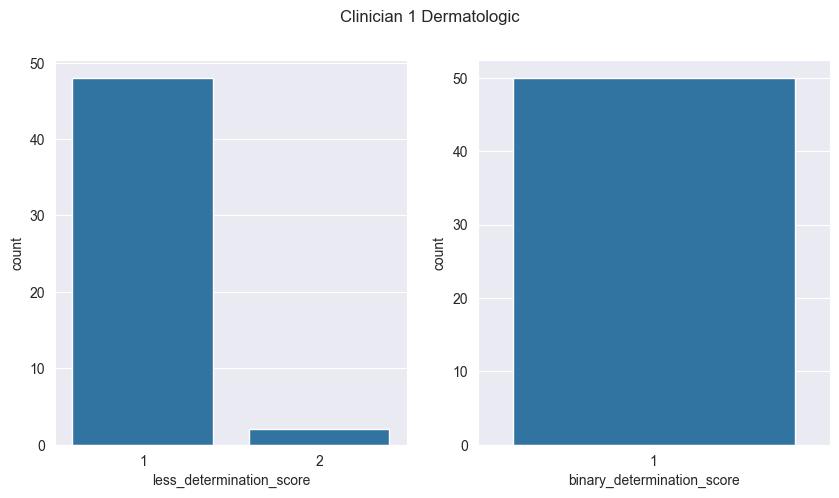

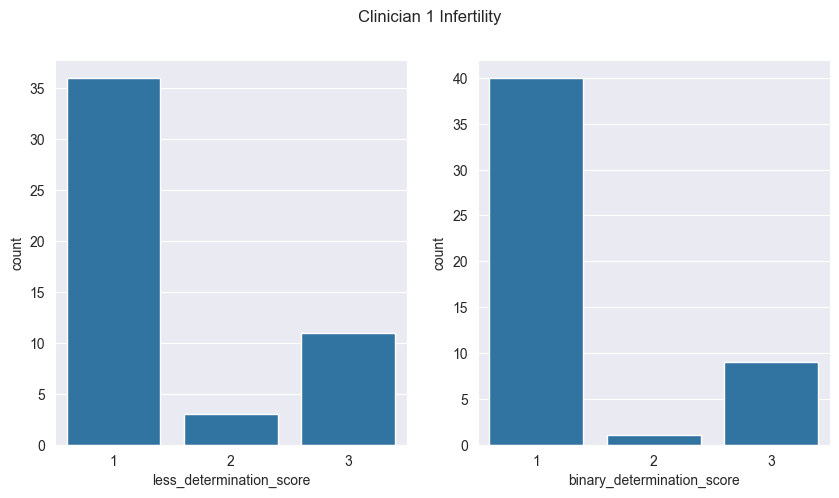

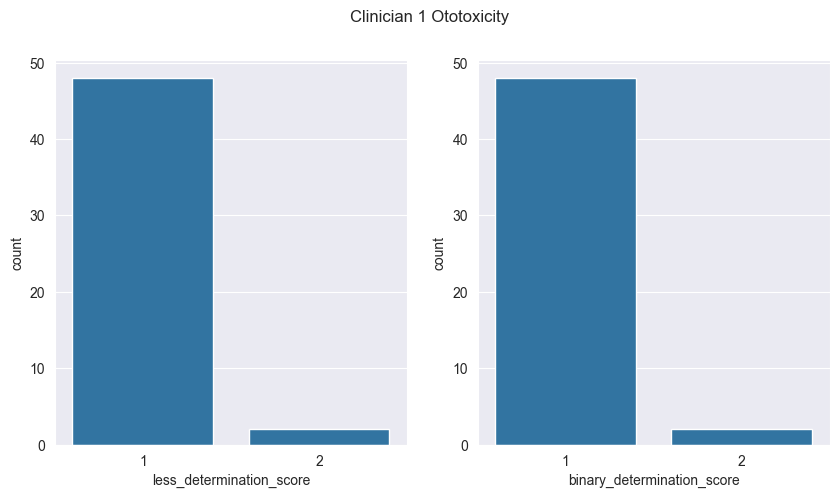

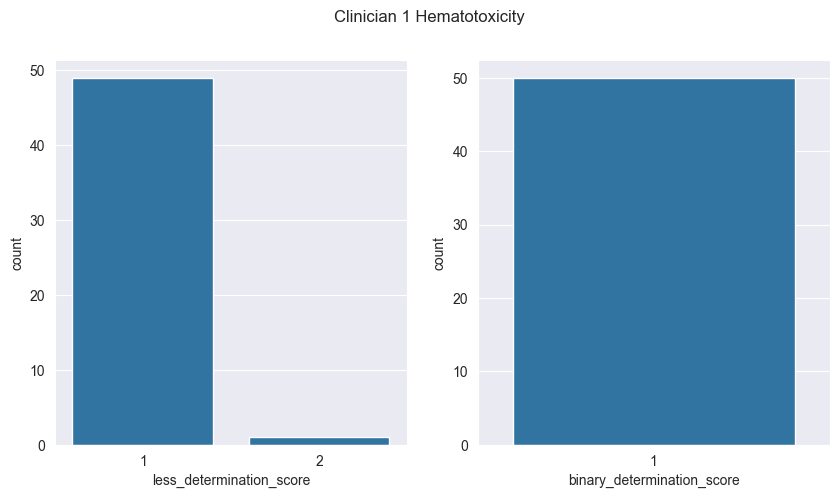

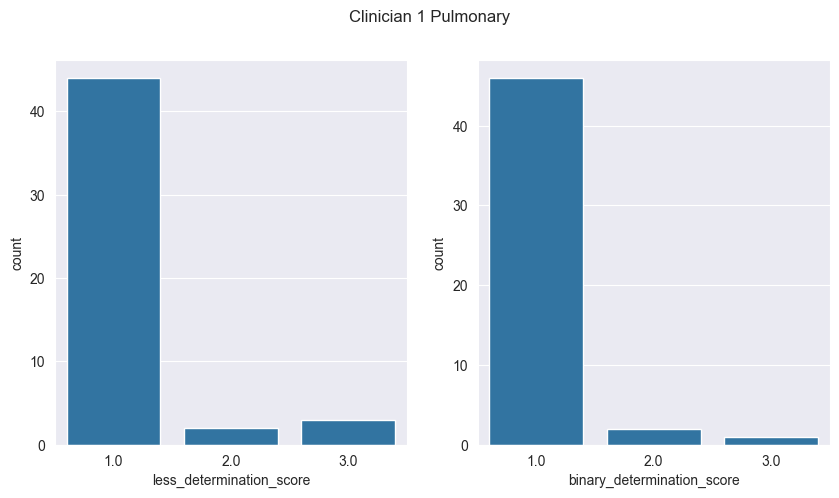

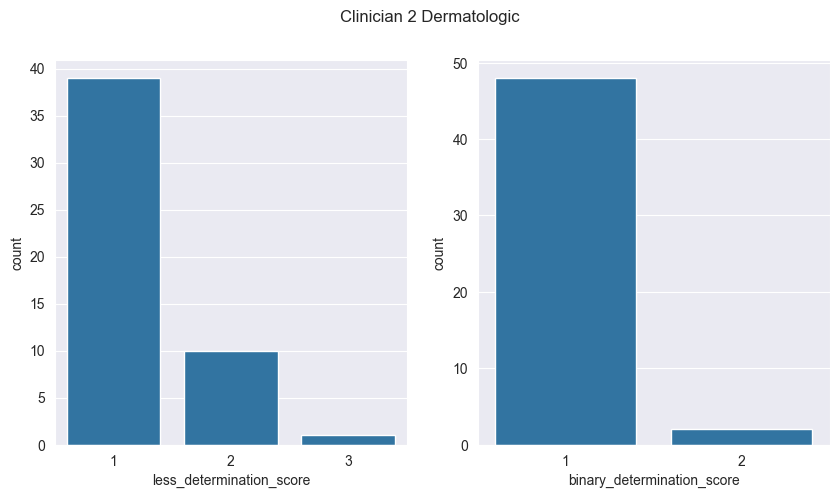

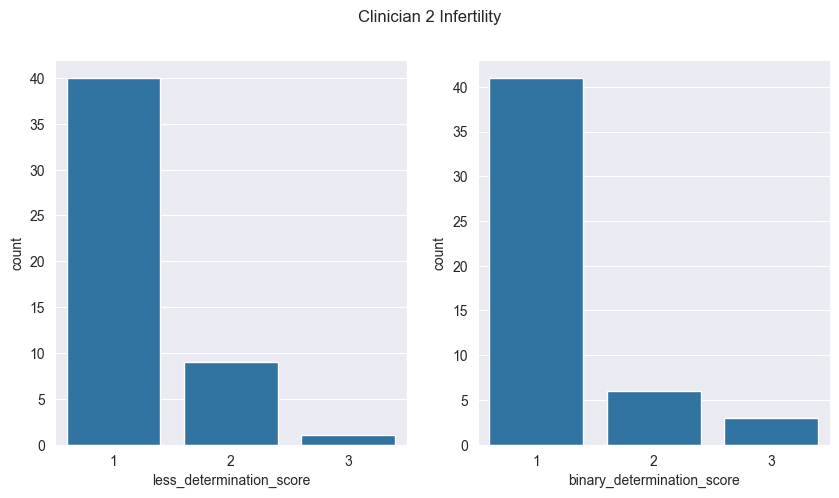

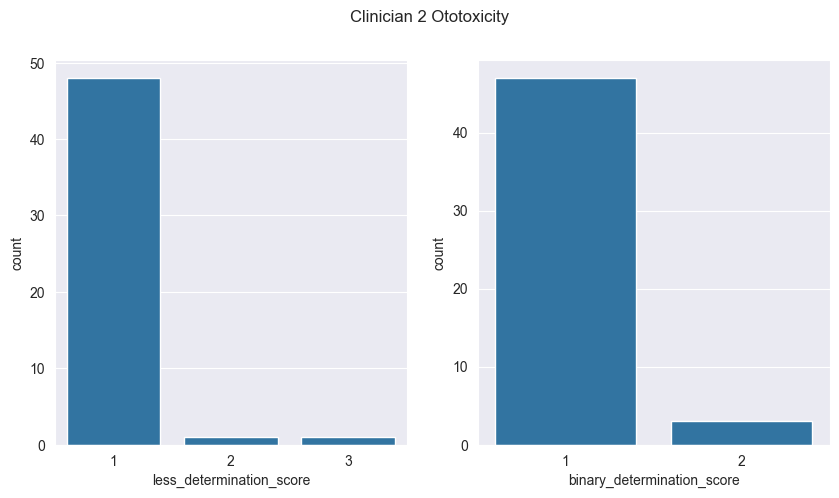

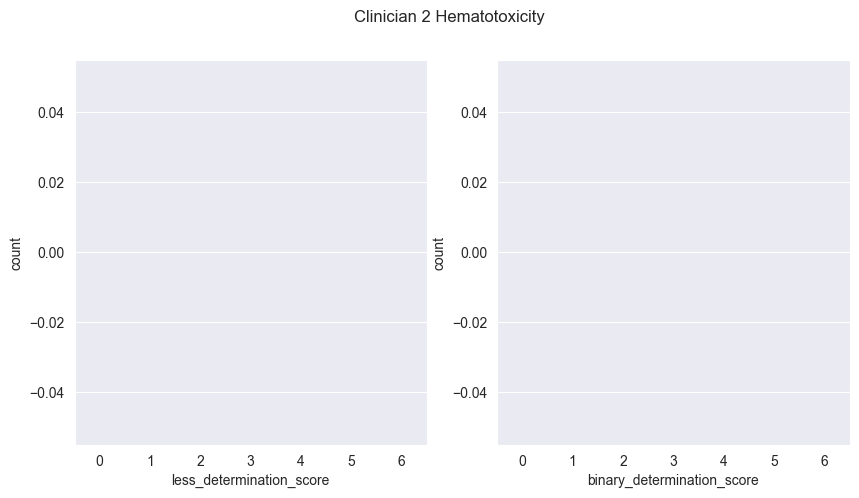

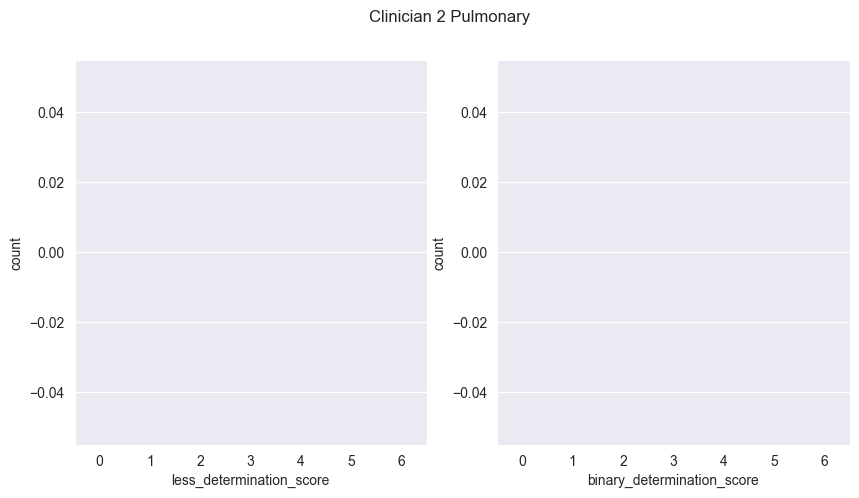

In [75]:
# Loop through each sheet of zaniar and make a bar plot of counts for less_rating_score and binary_rating_score
for name, data in name_to_data.items():
    for sheet, tox_data in data.items():
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        sns.countplot(x="less_rating_score", data=tox_data, ax=ax[0])
        sns.countplot(x="binary_rating_score", data=tox_data, ax=ax[1])
        fig.suptitle(f"{name} {sheet}")
        plt.show()

In [146]:
# Load GNN model results
chemprop_less_random = pd.read_csv("~/Downloads/FinaluniTox/models/chemprop_rdkit_confident_ternary_rating_0_1_cv/test_scores.csv")
chemprop_binary_random = pd.read_csv("~/Downloads/FinaluniTox/models/chemprop_rdkit_binary_rating_0_1_cv/test_scores.csv")
chemprop_less_scaffold = pd.read_csv("~/Downloads/FinaluniTox/models/chemprop_rdkit_confident_ternary_rating_0_1_scaffold_balanced/test_scores.csv")
chemprop_binary_scaffold = pd.read_csv("~/Downloads/FinaluniTox/models/chemprop_rdkit_binary_rating_0_1_scaffold_balanced/test_scores.csv")

In [147]:
task_map = {
    "cardio_toxicity": "Cardiotoxicity",
    "dermatologic_toxicity": "Dermatologic Toxicity",
    "hematotoxicity": "Hematotoxicity",
    "infertility": "Infertility",
    "liver_toxicity": "Liver Toxicity",
    "ototoxicity": "Ototoxicity",
    "pulmonary_toxicity": "Pulmonary Toxicity",
    "renal_toxicity": "Renal Toxicity",
}

In [148]:
for data in [chemprop_less_random, chemprop_binary_random, chemprop_less_scaffold, chemprop_binary_scaffold]:
    data["Task"] = [
        task.replace("_confident_ternary_rating_0_1", "").replace("_binary_rating_0_1", "")
        for task in data["Task"]
    ]
    data["Task"] = data["Task"].map(task_map)

/var/folders/mg/1myn4m316m9834glbhfg8_j40000gn/T/ipykernel_14564/2752273949.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


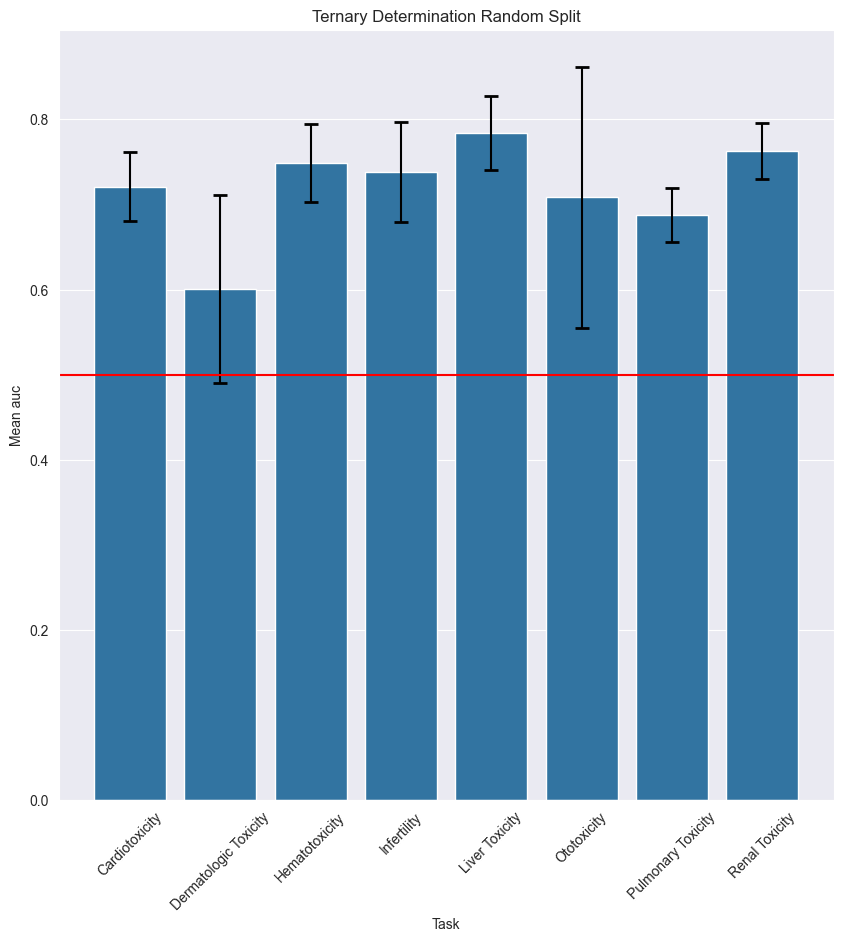

In [153]:
# Create bar plot of results for each model type using "Mean auc" and "Standard deviation auc"
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data=chemprop_less_random, x="Task", y="Mean auc", ax=ax)
ax.errorbar(x=np.arange(len(chemprop_less_random)),
            y=chemprop_less_random["Mean auc"],
            yerr=chemprop_less_random["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Ternary Rating Random Split")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_ternary_random.pdf", bbox_inches="tight")

/var/folders/mg/1myn4m316m9834glbhfg8_j40000gn/T/ipykernel_14564/4228135325.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


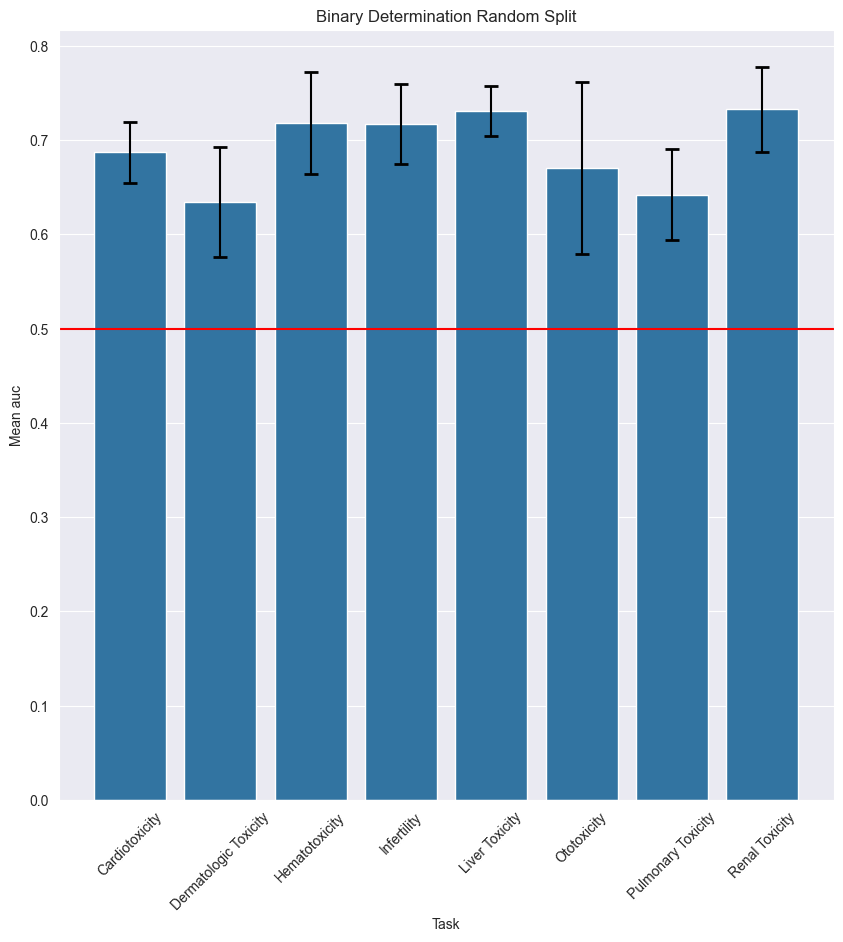

In [154]:
# Create bar plot of results for each model type using "Mean auc" and "Standard deviation auc"
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data=chemprop_binary_random, x="Task", y="Mean auc", ax=ax)
ax.errorbar(x=np.arange(len(chemprop_binary_random)),
            y=chemprop_binary_random["Mean auc"],
            yerr=chemprop_binary_random["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Binary Rating Random Split")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_binary_random.pdf", bbox_inches="tight")

/var/folders/mg/1myn4m316m9834glbhfg8_j40000gn/T/ipykernel_14564/1397061986.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


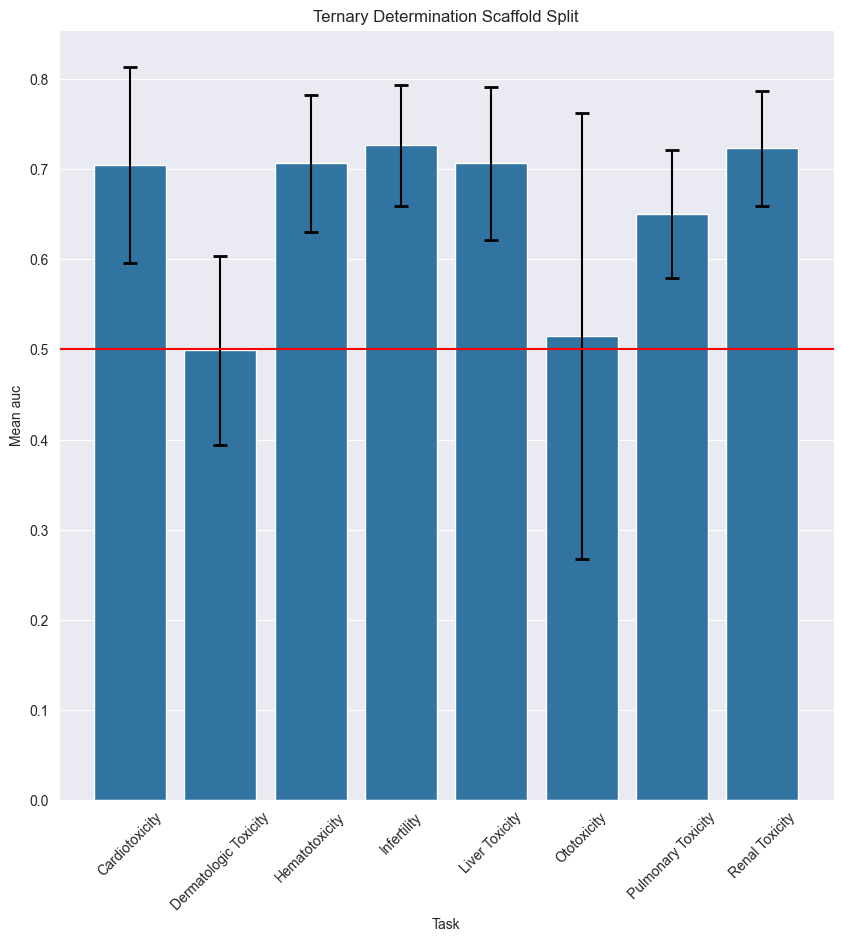

In [155]:
# Create bar plot of results for each model type using "Mean auc" and "Standard deviation auc"
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data=chemprop_less_scaffold, x="Task", y="Mean auc", ax=ax)
ax.errorbar(x=np.arange(len(chemprop_less_scaffold)),
            y=chemprop_less_scaffold["Mean auc"],
            yerr=chemprop_less_scaffold["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Ternary Rating Scaffold Split")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_ternary_scaffold.pdf", bbox_inches="tight")

/var/folders/mg/1myn4m316m9834glbhfg8_j40000gn/T/ipykernel_14564/108451352.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


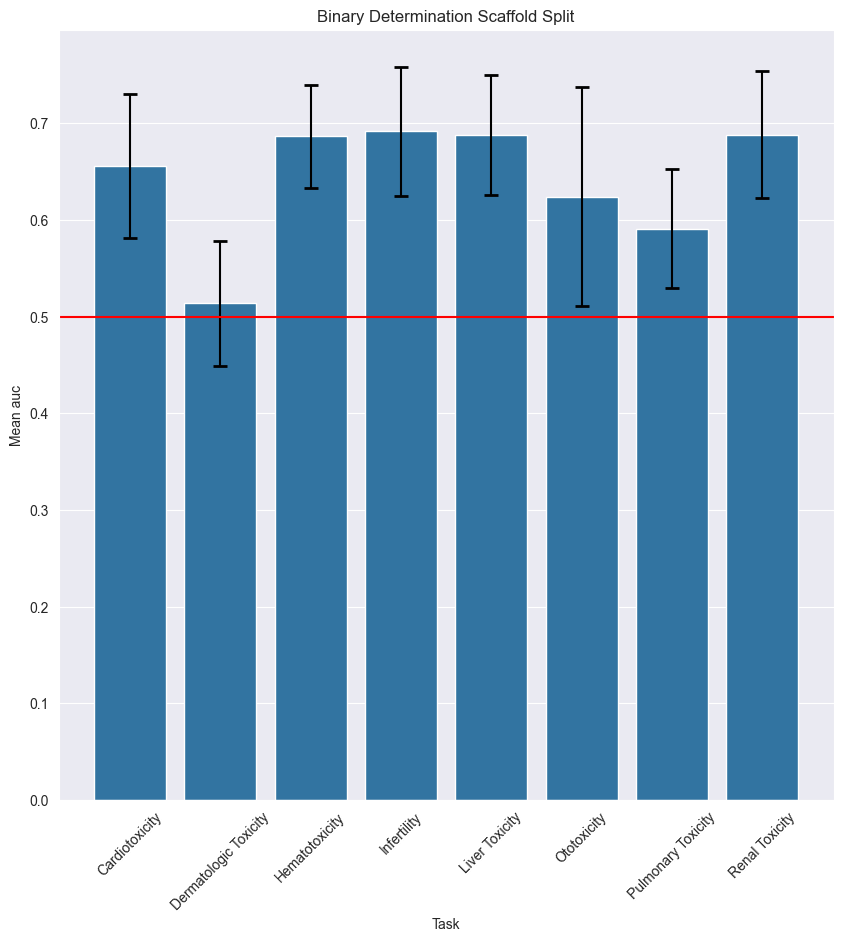

In [156]:
# Create bar plot of results for each model type using "Mean auc" and "Standard deviation auc"
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data=chemprop_binary_scaffold, x="Task", y="Mean auc", ax=ax)
ax.errorbar(x=np.arange(len(chemprop_binary_scaffold)),
            y=chemprop_binary_scaffold["Mean auc"],
            yerr=chemprop_binary_scaffold["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Binary Rating Scaffold Split")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_binary_scaffold.pdf", bbox_inches="tight")

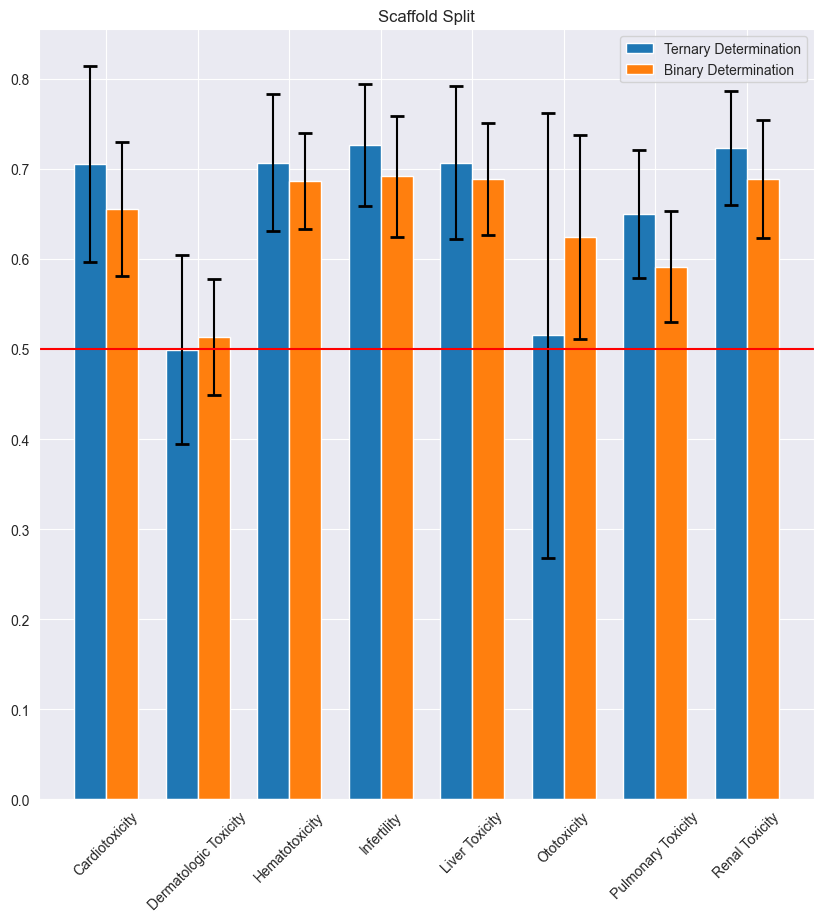

In [158]:
# Now plot both the chemprop less scaffold and chemprop binary scaffold on the same plot with side-by-side bar plots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bar_width = 0.35
x_axis = np.arange(len(chemprop_less_scaffold))
ax.bar(x_axis, chemprop_less_scaffold["Mean auc"], bar_width, label="Ternary rating")
ax.bar(x_axis + bar_width, chemprop_binary_scaffold["Mean auc"], bar_width, label="Binary Rating")
ax.errorbar(x=x_axis,
            y=chemprop_less_scaffold["Mean auc"],
            yerr=chemprop_less_scaffold["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.errorbar(x=x_axis + bar_width,
            y=chemprop_binary_scaffold["Mean auc"],
            yerr=chemprop_binary_scaffold["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Scaffold Split")
ax.set_xticks(x_axis + bar_width / 2)
ax.set_xticklabels(chemprop_less_scaffold["Task"], rotation=45)
ax.legend()
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_scaffold.pdf", bbox_inches="tight")

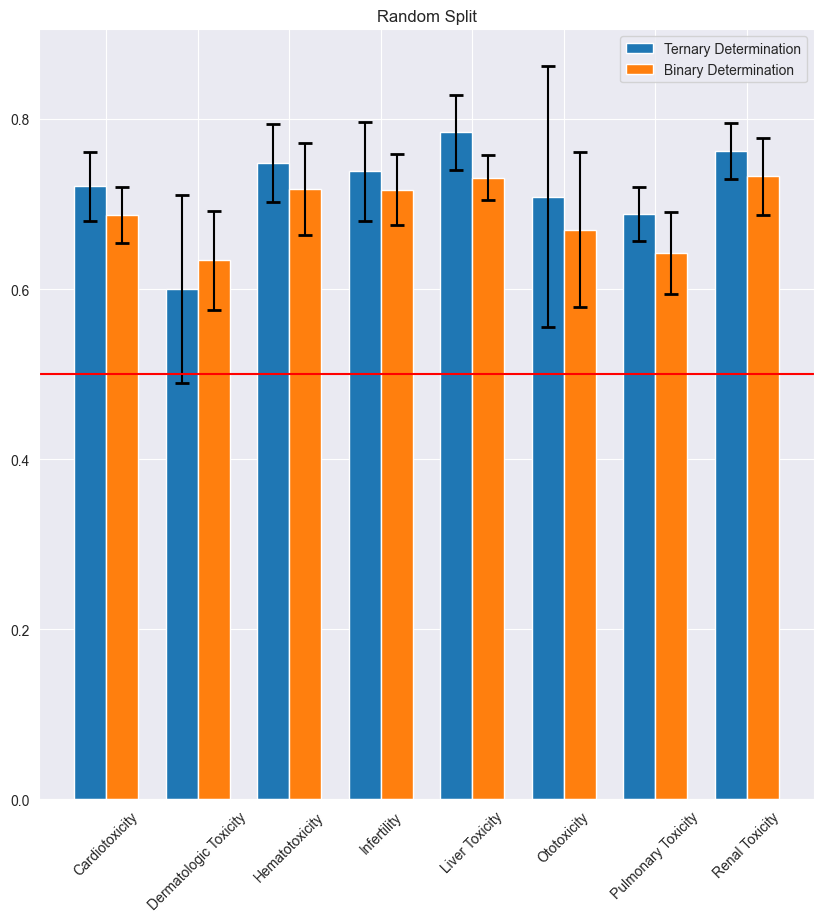

In [159]:
# Now plot both the chemprop less random and chemprop binary random on the same plot with side-by-side bar plots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bar_width = 0.35
x_axis = np.arange(len(chemprop_less_random))
ax.bar(x_axis, chemprop_less_random["Mean auc"], bar_width, label="Ternary Rating")
ax.bar(x_axis + bar_width, chemprop_binary_random["Mean auc"], bar_width, label="Binary Rating")
ax.errorbar(x=x_axis,
            y=chemprop_less_random["Mean auc"],
            yerr=chemprop_less_random["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.errorbar(x=x_axis + bar_width,
            y=chemprop_binary_random["Mean auc"],
            yerr=chemprop_binary_random["Standard deviation auc"],
            fmt='none',  # No markers
            ecolor='black',  # Color of the error bars
            capsize=5,  # Length of the error bar caps
            capthick=2)  # Thickness of the error bar caps
ax.set_title("Random Split")
ax.set_xticks(x_axis + bar_width / 2)
ax.set_xticklabels(chemprop_less_random["Task"], rotation=45)
ax.legend()
ax.axhline(0.5, color="red")
plt.savefig("/Users/kyleswanson/Downloads/FinaluniTox/figures/chemprop_random.pdf", bbox_inches="tight")

In [160]:
chemprop_less_scaffold

,Task,Mean auc,Standard deviation auc,Fold 0 auc,Fold 1 auc,Fold 2 auc,Fold 3 auc,Fold 4 auc,Fold 5 auc,Fold 6 auc,Fold 7 auc,Fold 8 auc,Fold 9 auc
0,Cardiotoxicity,0.705071,0.108935,0.808458,0.765873,0.437121,0.675309,0.791300,0.697821,0.686869,0.726000,0.835859,0.626100
1,Dermatologic Toxicity,0.499128,0.104981,0.515292,0.439560,0.365260,0.360241,0.428824,0.481959,0.693137,0.536822,0.513980,0.656201
2,Hematotoxicity,0.706830,0.076074,0.584416,0.761001,0.616689,0.773936,0.738491,0.643999,0.788988,0.750714,0.787774,0.622297
3,Infertility,0.726432,0.067502,0.830729,0.830357,0.616186,0.750583,0.745370,0.626786,0.719178,0.729852,0.700929,0.714349
4,Liver Toxicity,0.706742,0.084726,0.695489,0.669516,0.590133,0.703492,0.678961,0.646678,0.832659,0.828390,0.814965,0.607143
5,Ototoxicity,0.515030,0.247320,0.159292,0.308036,0.672619,0.495798,0.573554,0.890435,0.130435,0.552521,0.866055,0.501558
6,Pulmonary Toxicity,0.650300,0.071037,0.624896,0.703360,0.551045,0.622889,0.651184,0.538462,0.632911,0.715496,0.787013,0.675740
7,Renal Toxicity,0.723128,0.063593,0.729327,0.774536,0.622401,0.709815,0.709942,0.709059,0.623626,0.726784,0.835637,0.790154


In [161]:
chemprop_binary_scaffold

,Task,Mean auc,Standard deviation auc,Fold 0 auc,Fold 1 auc,Fold 2 auc,Fold 3 auc,Fold 4 auc,Fold 5 auc,Fold 6 auc,Fold 7 auc,Fold 8 auc,Fold 9 auc
0,Cardiotoxicity,0.655709,0.074462,0.591926,0.751515,0.500550,0.698217,0.745102,0.627298,0.709209,0.660636,0.680365,0.592272
1,Dermatologic Toxicity,0.513776,0.064484,0.615978,0.583008,0.456317,0.481183,0.405879,0.469048,0.597248,0.485303,0.507292,0.536508
2,Hematotoxicity,0.686440,0.053105,0.642735,0.726779,0.582596,0.716576,0.704441,0.626646,0.778617,0.709402,0.683687,0.692923
3,Infertility,0.691600,0.067144,0.710859,0.842936,0.583482,0.671380,0.730352,0.660900,0.714962,0.711184,0.613432,0.676511
4,Liver Toxicity,0.688405,0.062082,0.690293,0.646116,0.565705,0.714413,0.719268,0.651515,0.783169,0.768166,0.710578,0.634824
5,Ototoxicity,0.624100,0.113479,0.703273,0.449479,0.641667,0.661417,0.693788,0.653981,0.380952,0.705441,0.757785,0.593220
6,Pulmonary Toxicity,0.591166,0.061515,0.517992,0.588951,0.536218,0.550223,0.590698,0.521368,0.605800,0.653533,0.724786,0.622087
7,Renal Toxicity,0.688432,0.065573,0.679101,0.679927,0.601414,0.606228,0.766852,0.663845,0.616269,0.722064,0.792558,0.756061
